<a href="https://colab.research.google.com/github/Guillaume-mcgill/school/blob/main/Assignment1_Group_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Samuel Bernard [260983658]                                                                             
Mohul Sharma [260986320]                                                                  
Guillaume Rodier [260975661]

# **TASK 1 : ACQUIRE, PREPROCESS, AND ANALYZE THE DATA**


IMPORTS AND DATA FETCHING:



In [ ]:
#!pip install pandas    # Uncomment if PANDAS is not already downloaded on your computer

## IMPORTS ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                       # to draw correlation map
from scipy.io import arff                   # to load 2nd dataset

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## LOAD DATASET 1 ##
dataset_1 = pd.read_csv("/content/drive/MyDrive/hepatitis.csv", names=["Class","Age","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM","SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"])

# LOADING DATASET 2 #
data = arff.loadarff("/content/drive/MyDrive/messidor_features.arff")
dataset_2 = pd.DataFrame(data[0])
dataset_2.columns = ["QUALITY","PRE-SCREENING","MA CI 1","MA CI 2","MA CI 3","MA CI 4","MA CI 5","MA CI 6","EXUDATES 1","EXUDATES 2","EXUDATES 3","EXUDATES 4","EXUDATES 5","EXUDATES 6","EXUDATES 7","EXUDATES 8","EUCL. DIST.","DIAM. OPT. DISC.","AM/FM CLASS.","Class"]

## SET PANDAS TO DISPLAY ALL THE VALUES ##
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## SET CORRELATION MAP PARAMETERS ##
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

## COUNT THE NUMBER OF MISSING DATA POINTS IN EACH CLASS ##
dataset_1.eq('?').sum()                   # uncomment to show. Alternate version if we use nulls : dataset_1.isnull().sum()
#dataset_2.eq('?').sum()                   # uncomment to show. Alternate version if we use nulls : dataset_2.isnull().sum()

Class               0
Age                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

DATA CLEANING

In [ ]:
cds_1 = dataset_1[~dataset_1.eq('?').any(1)]                                    # Cleaned Dataset 1
cds_2 = dataset_2[~dataset_2.eq('?').any(1)]                                    # Cleaned Dataset 2

cds_2['Class'] = (cds_2['Class'] == b'1').astype(int)                           # In dataset 2, change b'0' and b'1' by 0 or 1

#cds_1   # uncomment to show cleaned dataset 1
#cds_2   # uncomment to show cleaned dataset 2

BASIC STATISTICS:

In dataset 1, there are 20 features and for each feature, 155 data points
In dataset 2, there are 20 features and for each feature, 1151 data points

In cleaned dataset 1, there are 20 features and for each feature, 80 data points
In cleaned dataset 2, there are 20 features and for each feature, 1151 data points

In cleaned dataset 1, there are 67 positives and 13 negatives
In cleaned dataset 2, there are 611 positives and 540 negatives

75 missing rows in dataset 1: [3, 56, 31, 41, 72, 92, 106, 118, 126, 141, 147, 148, 83, 6, 14, 44, 99, 4, 7, 8, 9, 65, 67, 73, 80, 91, 93, 101, 105, 107, 116, 123, 131, 136, 142, 144, 150, 55, 59, 71, 86, 115, 122, 0, 1, 2, 16, 26, 35, 37, 45, 46, 50, 51, 66, 69, 70, 74, 76, 79, 87, 88, 97, 110, 112, 113, 114, 119, 120, 132, 140, 146, 149, 151, 152]
                   QUALITY  PRE-SCREENING   MA CI 1   MA CI 2   MA CI 3  \
QUALITY           1.000000      -0.017611  0.035576  0.035929  0.033395   
PRE-SCREENING    -0.017611       1.000000  0.053300  0.0

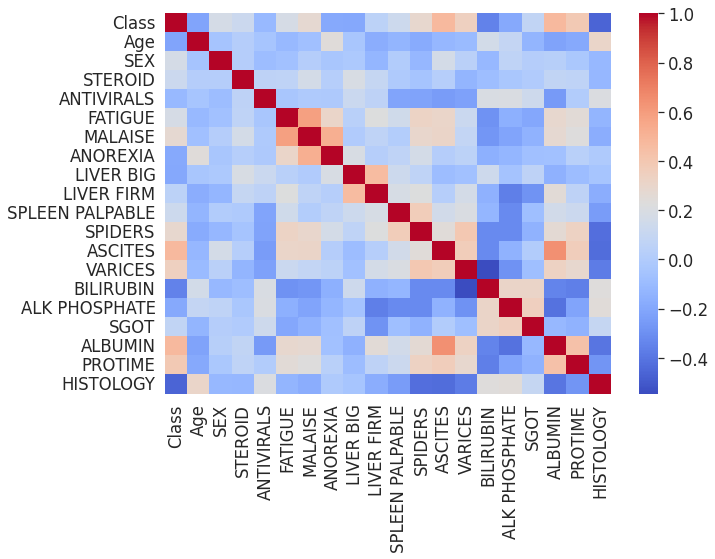

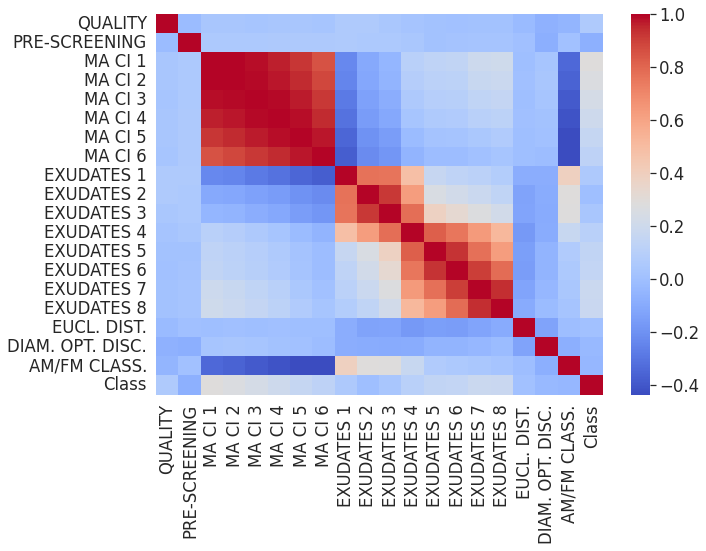

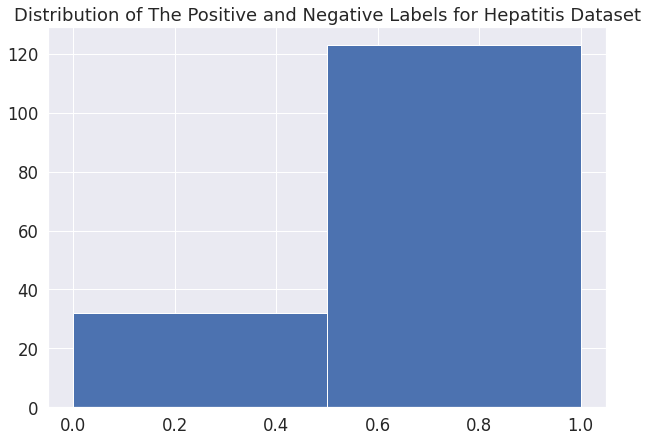

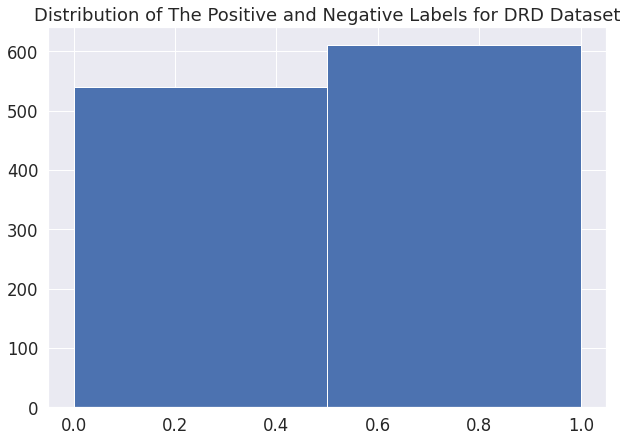

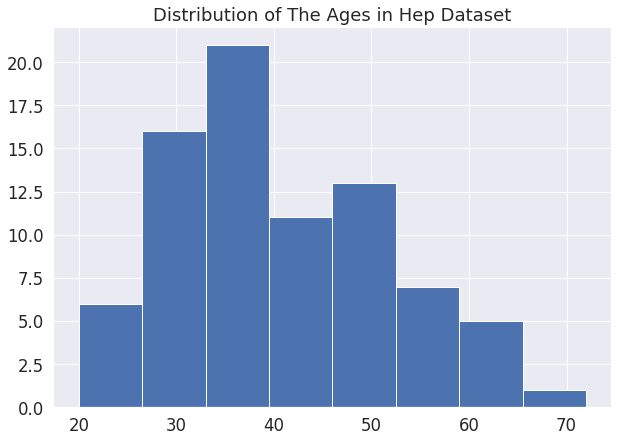

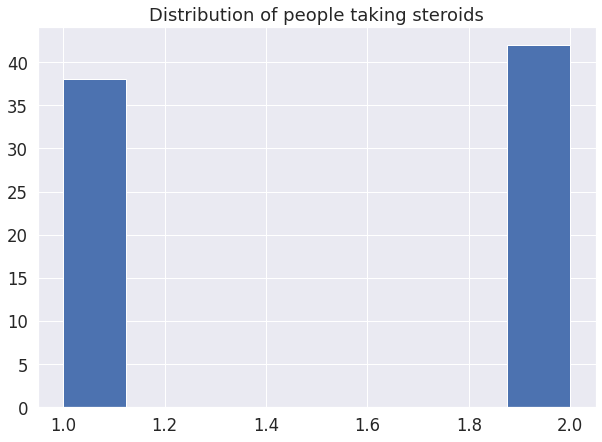

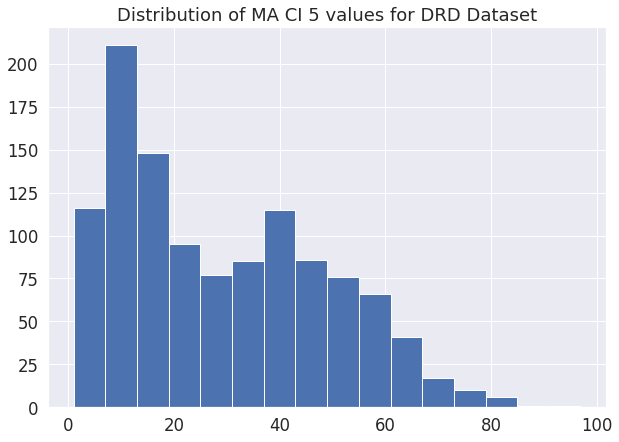

In [ ]:
## SHOW SHAPE OF UNCLEANED DATA ##
print(f"In dataset 1, there are {dataset_1.shape[1]} features and for each feature, {dataset_1.shape[0]} data points")
print(f"In dataset 2, there are {dataset_2.shape[1]} features and for each feature, {dataset_2.shape[0]} data points\n")

## SHOW SHAPE OF CLEANED DATA ##
print(f"In cleaned dataset 1, there are {cds_1.shape[1]} features and for each feature, {cds_1.shape[0]} data points")
print(f"In cleaned dataset 2, there are {cds_2.shape[1]} features and for each feature, {cds_2.shape[0]} data points\n")

## DISTRIBUTION OF POSITIVE\NEGATIVES CLASSES ##
print(f'In cleaned dataset 1, there are {cds_1["Class"].eq(2).sum()} positives and {cds_1["Class"].eq(1).sum()} negatives')
print(f'In cleaned dataset 2, there are {int(cds_2["Class"].eq(1).sum())} positives and {int(cds_2["Class"].eq(0).sum())} negatives\n')

## SHOW ROWS WITH MISSING VALUES IN DATASET 1                                   # dataset 2 doesn't have any missing value

dataset = np.array(dataset_1)
array = []

for feature in range(dataset.shape[1]):
  for row in range(dataset.shape[0]):
    if dataset[row][feature]=='?':
      if row not in array:
        array.append(row)
print(f"{len(array)} missing rows in dataset 1:",array)                         # dataset 1 has (155-80 = 75) rows with missing values

## CORRELATIONS ##

cds_1 = cds_1.astype(float)                                                     # correlation of dataset 1
corr1 = cds_1.corr()                                                            # create correlation matrix
#print(corr1)                                                                    # uncomment to show numerical values for correlation
corr1                                                                           # show correlation matrix
_, axes = plt.subplots(figsize=(10,7))                                          # group axes together
_ = sns.heatmap(corr1,                                                          # show correlation with a heat map
                ax = axes,
                xticklabels = True,
                yticklabels = True,
                cmap = 'coolwarm')


corr2 = cds_2.corr()                                                            # correlation of dataset 2
print(corr2)                                                                     # uncomment to show correlation matrix
_, axes = plt.subplots(figsize=(10,7))                                          # group axes together
_ = sns.heatmap(corr2,                                                          # show correlation with a heat map
                ax = axes,
                xticklabels = True,
                yticklabels = True,
                cmap = 'coolwarm')

## SIMPLE STATS ABOUT DATASETS ##
#cds_1.describe()                                                               # uncomment to show dataset 1 stats
#cds_2.describe()                                                               # uncomment to show dataset 2 stats

## HISTOGRAM FOR THE NUMERICAL FEATURES ##
#Histogram for Hep labels
cds1_copy=cds_1.copy()
cds1_copy=pd.DataFrame(cds1_copy).to_numpy() #Turn the pandas dataset into a numpy array to allow data manipulations for test and training
cds1_copy=cds1_copy.astype(float) #turn the string data into floats
x,y=dataset[:,1:],dataset[:,0].astype(int)
y-=1
plt.subplots(figsize=(10,7))
plt.hist(y, bins=2)  # arguments are passed to np.histogram
plt.title("Distribution of The Positive and Negative Labels for Hepatitis Dataset")
plt.show()

#Histogram for DRD labels
plt.subplots(figsize=(10,7))
plt.hist(cds_2["Class"], bins=2)  # arguments are passed to np.histogram
plt.title("Distribution of The Positive and Negative Labels for DRD Dataset")
plt.show()

#Histogram for age for Hep
plt.subplots(figsize=(10,7))
plt.hist(cds_1["Age"], bins='auto')  # arguments are passed to np.histogram
plt.title("Distribution of The Ages in Hep Dataset")
plt.show()

#Histogram for steroid for Hep
plt.subplots(figsize=(10,7))
plt.hist(cds_1["STEROID"], bins='auto')  # arguments are passed to np.histogram
plt.title("Distribution of people taking steroids")
plt.show()

#Histogram for MA CL1 for DRD
plt.subplots(figsize=(10,7))
plt.hist(cds_2["MA CI 5"], bins='auto')  # arguments are passed to np.histogram
plt.title("Distribution of MA CI 5 values for DRD Dataset")
plt.show()


#**TASK 2: IMPLEMENTING KNN AND DT**

Implementing KNN

In [ ]:
# euclidean distance:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1-x2)**2, axis=-1))

# Manhattan distance:
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

# Hamming distance
hamming = lambda x1, x2: np.sum(x1 == x2, axis=-1)

In [ ]:
class KNN:

  def __init__(self,K=1, distance_form=euclidean):                              #initialize the KNN attributes, such as the hyperparameter K and the distance formula
    self.distance_form=distance_form
    self.K=K
    return

  def fit(self,x,y):                                                            #function stores the training data from the dataset
    self.x=x
    self.y=y
    self.C=np.max(y)+1
    return self

  def predict(self,x_test):                                                     #Predict function takes the data from x_test and uses the distance formula to find the nearest neighbors for each x_test data point
    test_shape=x_test.shape[0]
    dist=self.distance_form(self.x[None,:,:],x_test[:,None,:])                  #use the distance formula and broadcasting properties to generate arrays of nearest values
    indKn=np.zeros((test_shape,self.K),dtype=int)                               #generate empty arrays which will store the K-nearest neighbors
    prob=np.zeros((test_shape,self.C))                                          #generate empty arrays that will store the # of times each class appears in indKn
    for i in range(test_shape):
      indKn[i,:]=np.argsort(dist[i])[:self.K]                                   #stores the indices after sorting the distances from small to large and only take the first K-neighbors
      prob[i,:]=np.bincount(self.y[indKn[i,:]], minlength=self.C)               #stores the number of times each class is obtained from the k-nearest neighbors

    prob/=self.K                                                                #get probability distribution
    pred = np.zeros(test_shape)
    for i in range(test_shape):
      pred[i]=np.argmax(prob[i])                                                #At index i of the pred array, insert the index (class) of the maximum probability (i.e., insert class prediction)
    return pred                                                                 #Return array of predicted labels

  def w_predict(self, x_test):                                                  #Weighted KNN prediction
    test_shape = x_test.shape[0]
    dist=self.distance_form(self.x[None,:,:],x_test[:,None,:])
    weights = 1/dist                                                            #Convert array of distances to array of weights via the weighting function: weight = 1/distance
    indKn=np.zeros((test_shape,self.K),dtype=int)
    prob=np.zeros((test_shape,self.C))
    pred = np.zeros(test_shape)
    for i in range(test_shape):
      indKn[i,:]=np.argsort(dist[i])[:self.K]
      labels_and_weights = {}
      for ind in indKn[i,:]:                                                    #For each index value in the indKn array
        label = self.y[ind]                                                     #Label at the corresponding index value is stored
        weight = weights[i, ind]                                                #Weight at the corresponding index value is stored
        if label in labels_and_weights:
          labels_and_weights[label] = labels_and_weights[label] + weight        #If label is already a key in the dictionary, add the value stored in the weight variable to the value in the dictionary
        else:
          labels_and_weights[label] = weight                                    #If label is not already a key in the dictionary, add it and include the value stored in the weight variable as the value
      prob[i,:]=np.bincount(self.y[indKn[i,:]], minlength=self.C)
      prediction = max(labels_and_weights, key = labels_and_weights.get)        #Predict label; maximum is used because weight is inverse to distance, lower distance = bigger weight
      pred[i] = prediction
    return pred                                                                 #Return array of predictions


Implementing DT

In [ ]:
class Node:                                                                     #generate the nodes
  def __init__(self,value_index,features,labels,n_classes,tree_depth):
    self.value_index=value_index                                                #Storing the index of the remaining rows
    self.left=None                                                              #initially, there are no left nodes, but as we descend the tree, we will store the left child nodes in this
    self.right=None                                                             #Similarly, for the right nodes
    self.feature_split=None                                                     #Store the feature_split for each node individually
    self.value_split=None                                                       #Store the value of the feature

    self.features=features                                                      #Store the data
    self.labels=labels                                                          #Store the labels of the data for that node
    self.n_classes=n_classes                                                    #Store the number of classes
    self.tree_depth=tree_depth+1                                                #increase the tree depth from the parent or previous decision node

    class_quantity=np.bincount(self.labels[value_index],minlength=self.n_classes)
    self.prob_of_class=class_quantity/np.sum(class_quantity)                    #calculate the probability of each node being what class

In [ ]:
def greedy_heuristic(node,cost_functions):                                      #generate all possible splits in function of each feature and find the one combination that has the lowest costs
  min_cost,feature_split,value_split=np.inf,None,None                           #initialize the values
  feature_in_data=node.features
  n_data,n_features=feature_in_data.shape                                       #store the dimensions of the data
  #for the split
  sorted=np.sort(feature_in_data[node.value_index],axis=0)                      #sort features by modifying the rows
  calculated_splits=(sorted[1:]+sorted[:-1])/2.                                 #find the middle values between each data point in each feature, so that we don't split a data point in half

  for feature in range(n_features):                                             #iterate through all features
    for value in calculated_splits[:,feature]:                                  #iterate through each split value for each feature
      left=node.value_index[feature_in_data[node.value_index,feature]<=value]   #for each feature, find the indices of the data points that are above and below/equal to the split value
      right=node.value_index[feature_in_data[node.value_index,feature]>value]
      if len(left)==0 or len(right)==0:                                         #if there are no values in the left or right, then it cannot be split further and the returned cost is infinity
        continue
      cost_left,cost_right=cost_functions(node.labels[left]),cost_functions(node.labels[right]) #store the costs of the left and right nodes depending on the cost function used
      total_cost=(left.shape[0]*cost_left+right.shape[0]*cost_right)/n_data     #calculate the total cost of that split
      if total_cost<min_cost:                                                   #If that split allowed to lower the cost, then that cost replaces the current minimal cost and the initialized values are updated
        min_cost=total_cost
        feature_split=feature
        value_split=value

  return min_cost,feature_split,value_split                                     #once all the features and split values have been iterated, the function returns the conditions to obtain the minimal cost as well as the minimal cost


In [ ]:
def gini_index(labels):
  prob_of_class=np.bincount(labels)/len(labels)                                 #count the number of times the data was correctly classified
  #divide by the number of data points to find the probability that the data will be correctly classified
  return 1-np.sum(np.square(prob_of_class))

def entropy_calculation(labels):                                                #considers both the probability of each node predicting the correct and incorrect class
  prob_getclass=np.bincount(labels)/len(labels)
  prob_getclass=prob_getclass[prob_getclass>0]                                  #so that we have no problem with the log2 function
  return np.sum(-prob_getclass*np.log2(prob_getclass))

def misclassification_calculation(labels):
  frequent_label=np.bincount(labels)/len(labels)                                #find the probability of each label, the highest probability is the one that has the highest chance of being predicted
  return 1-np.max(frequent_label)                                               #1-that highest prob gives you the misclassification_calculation


In [ ]:
class DT:
  def __init__(self,n_classes=None,maximal_depth=3, cost_functions=misclassification_calculation, minimal_leaf_samples=1): #initialize the root and important parameters
    self.root=None                                                              #store the root node
    self.n_classes=n_classes                                                    #store the n_classes which is initially None
    self.maximal_depth=maximal_depth                                            #store the maximal depth, that can be obtained through out the tree
    self.cost_functions=cost_functions                                          #define which cost function will be used for the greedy heuristic
    self.minimal_leaf_samples=minimal_leaf_samples                              #store the minimal_leaf_samples that can be reach in a node for it to become a leaf

  def fit(self, features,labels):                                               #Implementing fit
    self.features=features                                                      #the current data for the root
    self.labels=labels                                                          #the current labels for the root
    if not self.n_classes:                                                      #define the number of classes for the root
      self.n_classes=np.max(labels)+1
    self.root=Node(np.arange(features.shape[0]),features,labels,self.n_classes,-1) #intantialize the root, while passing the data indices, all feature points and labels, the number of classes and -1 as maximal depth as the node function returns depth+1 which will equate to 0
    self.build_tree(self.root)                                                  #start the recursive by building the tree starting with root
    return self

  def build_tree(self, node):                                                   #building the rest of the true
    if node.tree_depth<self.maximal_depth and len(node.value_index)>self.minimal_leaf_samples: #make sure that the tree depth hasn't exceeded the maximal depth and that there is more than 1 data point in the node
      minimal_cost,feature_split,value_split=greedy_heuristic(node,self.cost_functions) #define important variables for splitting the nodes and the lowest cost
      if minimal_cost==np.inf:                                                  #if minimal_cost is infinity, this means that we cannot split further
        return
      node.value_split,node.feature_split=value_split,feature_split             #defining values for the node class
      #separation is to obtain an array of True for features below or equal to the value split at a specific feature_split column
      separation=node.features[node.value_index,feature_split]<=value_split
      left=Node(node.value_index[separation],node.features,node.labels,node.n_classes,node.tree_depth) #instantialize the left node using the index of the data points that were lower then the value split and therefore were True
      right=Node(node.value_index[separation!=True],node.features,node.labels,node.n_classes,node.tree_depth) #instantialize the right node using the index of the data points that were bigger or equal then the value split and therefore were True
      self.build_tree(left)                                                     #recursive to build the rest of the tree
      self.build_tree(right)
      node.left=left                                                            #storing the left and right nodes
      node.right=right
    else:
      return

  def predict(self, testing):
    prob_of_class=np.zeros((testing.shape[0],self.n_classes))                   #generating an empty array that will contain the probabilities of each class being predicted
    for i,j in enumerate(testing):
      node=self.root                                                            #going into the memory of the tree to trace back the nodes
      while node.left:                                                          #Find where the current data from testing matches with the correct node
        if j[node.feature_split]<=node.value_split:                             #by trying to see if each data point for a node's specific feature is lower than that node's split value, we can navigate through the tree to find the estimated corresponding node
          node=node.left
        else:
          node=node.right
      prob_of_class[i,:]=node.prob_of_class                                     #fill the array with the probability of predictions of being a specific class defined in the Class Node
    pred = np.zeros(testing.shape[0])
    for i in range(testing.shape[0]):
      pred[i]=np.argmax(prob_of_class[i])
    return pred

FUNCTION TO TEST MODEL'S ACCURACY:

In [ ]:
def evaluate_acc(actual_y, test_result_y):
  n = 0
  for index in range(len(actual_y)):
    if int(actual_y[index]) == int(test_result_y[index]):                       #If the actual label value at the index is equal to the predicted label value at the index, add 1 to current value of n
      n = n + 1
  accuracy = (n/len(actual_y))*100                                              #Determine accuracy in percentage
  return accuracy                                                               #Return accuracy value

#**TASK 3: RUNNING EXPERIMENTS**

FUNCTION TO STANDARDIZE DATA:

In [ ]:
def standardization(X_array):                                                   #Input is an array containing the feature values
  for index in range(X_array.shape[1]):
    X_array[:,index] = (X_array[:,index] - np.average(X_array[:,index]))/np.std(X_array[:,index]) #Standardize each column seperately
  return X_array                                                                #Return the newly standardized version of X_array

INITIALIZING DATA FOR EXPERIMENTATION:

In [ ]:
#Initializing hepatitis data stored in cds_1
hepatitis_y = (cds_1['Class']).to_numpy(dtype = int) -1                         #labels array for hepatitis data
hepatitis_x = (cds_1.drop(columns = ['Class'])).to_numpy(dtype = float)         #features array for hepatitis data
                                                                                #Later, comparisons will be made between the accuracy of standardized data and non-standardized data
#Initializing DR data stored in  cds_2
DRD_y = (cds_2['Class']).to_numpy(dtype=int)                                    #labels array for DRD data
DRD_y=np.reshape(DRD_y, DRD_y.size)                                             #Turn a 1151,1 array into 1151,
DRD_x = (cds_2.drop(columns = ['Class'])).to_numpy(dtype = float)               #features array for DRD data

In [ ]:
np.random.seed(1234)

#Seperating training and testing data for hepatitis data
indices_array = np.random.permutation(len(hepatitis_y)) #An array of randomly permutated indices from 0 to the length of the labels array -1
hep_test_x, hep_test_y = hepatitis_x[indices_array[(int(0.75*len(indices_array))):]], hepatitis_y[indices_array[(int(0.75*len(indices_array))):]] #testing sets are determined from the last 25% of indices in the indices array
hep_train_x, hep_train_y = hepatitis_x[indices_array[:(int(0.75*len(indices_array)))]], hepatitis_y[indices_array[:(int(0.75*len(indices_array)))]] #training sets are determined from the first 75% of indices in the indices array
stand_hep_test_x, stand_hep_train_x = standardization(hep_test_x.copy()), standardization(hep_train_x.copy()) #Standardized testing and training inputs using the standardization function

#Seperating training and testing data for DRD data, same method as shown above in the hepatitis data
indices_array = np.random.permutation(len(DRD_y))
DRD_test_x, DRD_test_y = DRD_x[indices_array[(int(0.75*len(indices_array))):]], DRD_y[indices_array[(int(0.75*len(indices_array))):]]
DRD_train_x, DRD_train_y = DRD_x[indices_array[:(int(0.75*len(indices_array)))]], DRD_y[indices_array[:(int(0.75*len(indices_array)))]]
stand_DRD_test_x, stand_DRD_train_x = standardization(DRD_test_x.copy()), standardization(DRD_train_x.copy())

In [ ]:
def getting_validation(training_x, training_y ,split_fraction):                 #This function splits the training data into training and validation data sets based on an inputed fraction for splitting
  size = training_x.shape[0]
  train_x, train_y = training_x[:int(split_fraction*size)],training_y[:int(split_fraction*size)] #Splitting into training data
  validation_x, validation_y = training_x[int(split_fraction*size):], training_y[int(split_fraction*size):] #Splitting into validation data
  return train_x, train_y, validation_x, validation_y                           #Return training data sets and validation data sets

#This function (for standard KNN prediction) will return a dictionary of k_values and corresponding validation accuracy, as well as the testing accuracy computed with the k-value returning the best validation acuracy
def s_find_best_k(training_x, training_y, testing_x, testing_y, distance_fn, max_k): #Takes inputs: testing data, training data, distance function, and maximum k-value to test
  train_x, train_y, validation_x, validation_y = getting_validation(training_x, training_y, 0.75) #Create validation data set, where validation data set is 25% of original training data set
  best_acc = 0
  best_k = 0
  valid_k_and_acc = {}
  for k in range(1, max_k + 1):                                                 #For each k-value betweem 1 and the inputed maximum k-value (inclusive)
    knn_procedure = KNN(K=k, distance_form=distance_fn)                         #Initialize KNN class with the current k-value
    knn_predict = knn_procedure.fit(train_x, train_y).predict(validation_x)     #Predict labels of validation inputs
    accuracy = evaluate_acc(validation_y, knn_predict)                          #Determine prediction accuracy of the validation inputs
    valid_k_and_acc[k] = accuracy                                               #Add to the dictionary: K as the key, validation accuracy as value
    if accuracy > best_acc:                                                     #Keep track of best k and accuracy so far
      best_acc = accuracy
      best_k = k
  knn_procedure = KNN(K=best_k, distance_form=distance_fn)                      #Initialize KNN class with the best found k-value
  knn_predict = knn_procedure.fit(train_x, train_y).predict(testing_x)          #Predict label of testing data set
  test_acc = evaluate_acc(testing_y, knn_predict)                               #Evaludate testing accuracy
  return valid_k_and_acc, best_acc, best_k, test_acc                            #Return necessary varisbles

#This function (for weighted KNN prediction) will return a dictionary of k_values and corresponding validation accuracy, as well as the testing accuracy computed with the k-value returning the best validation acuracy
#This is the same code as for the s_find_best_k function, but uses the weighted KNN prediction method rather than the standard one
def w_find_best_k(training_x, training_y, testing_x, testing_y, distance_fn, max_k):
  train_x, train_y, validation_x, validation_y = getting_validation(training_x, training_y, 0.75)
  best_acc = 0
  best_k = 0
  valid_k_and_acc = {}
  for k in range(1, max_k + 1):
    knn_procedure = KNN(k, distance_fn)
    knn_predict = knn_procedure.fit(train_x, train_y).w_predict(validation_x)
    accuracy = evaluate_acc(validation_y, knn_predict)
    valid_k_and_acc[k] = accuracy
    if accuracy > best_acc:
      best_acc = accuracy
      best_k = k
  knn_procedure = KNN(best_k, distance_fn)
  knn_predict = knn_procedure.fit(train_x, train_y).w_predict(testing_x)
  test_acc = evaluate_acc(testing_y, knn_predict)
  return valid_k_and_acc, best_acc, best_k, test_acc

#This function (for Decision Tree) will return a dictionary of maximal depth values and corresponding validation accuracy, as well as the testing accuracy computed with the maximum depth value returning the best validation acuracy
#This is the same function as the two above, but calls the Decision tree class (while varying the maximum depth value and takes input the cost function instead of distance function)
def find_best_max_depth(training_x, training_y, testing_x, testing_y, cost_function, max_value_for_depth):
  train_x, train_y, validation_x, validation_y = getting_validation(training_x, training_y, 0.75)
  best_acc = 0
  best_max_depth = 0
  depth_and_acc_dict = {}
  for depth_value in range(1, max_value_for_depth+1):
    decisiontree = DT(maximal_depth = depth_value, cost_functions = cost_function)
    decisiontree_predict = decisiontree.fit(train_x, train_y).predict(validation_x)
    accuracy = evaluate_acc(validation_y, decisiontree_predict)
    depth_and_acc_dict[depth_value] = accuracy
    if accuracy > best_acc:
      best_acc = accuracy
      best_max_depth = depth_value
  decisiontree = DT(maximal_depth = best_max_depth, cost_functions = cost_function)
  decisiontree_predict = decisiontree.fit(training_x, training_y).predict(testing_x)
  test_acc = evaluate_acc(testing_y, decisiontree_predict)
  return depth_and_acc_dict, best_acc, best_max_depth, test_acc


Accuracy of the standard KNN algorithm:

In [ ]:
#Start off by calling the s_find_best_k function on non-standardized data with the eucledian distance function
hep_dict, hep_best_acc, hep_best_k, hep_test_acc = s_find_best_k(hep_train_x, hep_train_y, hep_test_x, hep_test_y, euclidean, 15)
print('Using the hepatitis validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows:', hep_dict)
print('The best accuracy, corresponding to', hep_best_acc, '% was found at K-value of', hep_best_k)
print('On the testing hepatitis data set, this K-value returned an accuracy of', hep_test_acc)

DRD_dict, DRD_best_acc, DRD_best_k, DRD_test_acc = s_find_best_k(DRD_train_x, DRD_train_y, DRD_test_x, DRD_test_y, euclidean, 80)
print('\nUsing the DRD validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows:', DRD_dict)
print('The best accuracy, corresponding to', DRD_best_acc, '% was found at K-value of', DRD_best_k)
print('On the testing DRD data set, this K-value returned an accuracy of', DRD_test_acc)

#Note that the difference in maximum k-value allowed (15 for Hepatitis and 80 for DRD) is to account for the different in size of the datasets

Using the hepatitis validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows: {1: 80.0, 2: 80.0, 3: 86.66666666666667, 4: 86.66666666666667, 5: 86.66666666666667, 6: 86.66666666666667, 7: 86.66666666666667, 8: 86.66666666666667, 9: 86.66666666666667, 10: 86.66666666666667, 11: 86.66666666666667, 12: 86.66666666666667, 13: 86.66666666666667, 14: 86.66666666666667, 15: 86.66666666666667}
The best accuracy, corresponding to 86.66666666666667 % was found at K-value of 3
On the testing hepatitis data set, this K-value returned an accuracy of 70.0

Using the DRD validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows: {1: 63.42592592592593, 2: 63.888888888888886, 3: 60.64814814814815, 4: 65.27777777777779, 5: 65.74074074074075, 6: 64.35185185185185, 7: 62.96296296296296, 8: 65.74074074074075, 9: 64.81481481481481, 10: 64.81481481481481, 11: 65.27777777777779, 1

Impact of standardizing data on KNN prediction accuracy:

In [ ]:
#Next, call the s_find_best_k function on standardized data with the eucledian distance function
hep_dict, hep_best_acc, hep_best_k, hep_test_acc = s_find_best_k(stand_hep_train_x, hep_train_y, stand_hep_test_x, hep_test_y, euclidean, 15)
print('Using the hepatitis validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows:', hep_dict)
print('The best accuracy, corresponding to', hep_best_acc, '% was found at K-value of', hep_best_k)
print('On the testing hepatitis data set, this K-value returned an accuracy of', hep_test_acc)

DRD_dict, DRD_best_acc, DRD_best_k, DRD_test_acc = s_find_best_k(stand_DRD_train_x, DRD_train_y, stand_DRD_test_x, DRD_test_y, euclidean, 80)
print('\nUsing the DRD validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows:', DRD_dict)
print('The best accuracy, corresponding to', DRD_best_acc, '% was found at K-value of', DRD_best_k)
print('On the testing DRD data set, this K-value returned an accuracy of', DRD_test_acc)

Using the hepatitis validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows: {1: 80.0, 2: 80.0, 3: 86.66666666666667, 4: 80.0, 5: 93.33333333333333, 6: 93.33333333333333, 7: 93.33333333333333, 8: 86.66666666666667, 9: 93.33333333333333, 10: 86.66666666666667, 11: 93.33333333333333, 12: 86.66666666666667, 13: 93.33333333333333, 14: 93.33333333333333, 15: 86.66666666666667}
The best accuracy, corresponding to 93.33333333333333 % was found at K-value of 5
On the testing hepatitis data set, this K-value returned an accuracy of 85.0

Using the DRD validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows: {1: 62.96296296296296, 2: 66.20370370370371, 3: 60.64814814814815, 4: 62.03703703703704, 5: 56.94444444444444, 6: 62.03703703703704, 7: 60.64814814814815, 8: 62.96296296296296, 9: 64.35185185185185, 10: 66.20370370370371, 11: 68.05555555555556, 12: 68.05555555

Impact of weighting data on KNN prediction accuracy:

In [ ]:
#Next, call the w_find_best_k function on non-standardized data with the eucledian distance function
hep_dict, hep_best_acc, hep_best_k, hep_test_acc = w_find_best_k(hep_train_x, hep_train_y, hep_test_x, hep_test_y, euclidean, 15)
print('Using the hepatitis validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows:', hep_dict)
print('The best accuracy, corresponding to', hep_best_acc, '% was found at K-value of', hep_best_k)
print('On the testing hepatitis data set, this K-value returned an accuracy of', hep_test_acc)

DRD_dict, DRD_best_acc, DRD_best_k, DRD_test_acc = w_find_best_k(DRD_train_x, DRD_train_y, DRD_test_x, DRD_test_y, euclidean, 80)
print('\nUsing the DRD validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows:', DRD_dict)
print('The best accuracy, corresponding to', DRD_best_acc, '% was found at K-value of', DRD_best_k)
print('On the testing DRD data set, this K-value returned an accuracy of', DRD_test_acc)

Using the hepatitis validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows: {1: 80.0, 2: 80.0, 3: 86.66666666666667, 4: 86.66666666666667, 5: 80.0, 6: 86.66666666666667, 7: 86.66666666666667, 8: 86.66666666666667, 9: 80.0, 10: 86.66666666666667, 11: 86.66666666666667, 12: 86.66666666666667, 13: 86.66666666666667, 14: 86.66666666666667, 15: 86.66666666666667}
The best accuracy, corresponding to 86.66666666666667 % was found at K-value of 3
On the testing hepatitis data set, this K-value returned an accuracy of 70.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide



Using the DRD validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows: {1: 63.42592592592593, 2: 63.42592592592593, 3: 61.57407407407407, 4: 63.888888888888886, 5: 65.27777777777779, 6: 65.27777777777779, 7: 64.81481481481481, 8: 63.42592592592593, 9: 65.27777777777779, 10: 65.74074074074075, 11: 65.74074074074075, 12: 65.74074074074075, 13: 66.20370370370371, 14: 64.35185185185185, 15: 64.35185185185185, 16: 66.20370370370371, 17: 64.35185185185185, 18: 66.20370370370371, 19: 64.81481481481481, 20: 66.66666666666666, 21: 64.35185185185185, 22: 65.74074074074075, 23: 65.27777777777779, 24: 67.5925925925926, 25: 65.27777777777779, 26: 66.20370370370371, 27: 67.12962962962963, 28: 67.12962962962963, 29: 67.5925925925926, 30: 67.5925925925926, 31: 67.12962962962963, 32: 67.5925925925926, 33: 66.66666666666666, 34: 66.66666666666666, 35: 66.66666666666666, 36: 68.05555555555556, 37: 67.12962962962963, 38: 66.20370370370371

Impact of standardizing and weighting data on KNN prediction accuracy

In [ ]:
#Next, call the w_find_best_k function on standardized data with the eucledian distance function
hep_dict, hep_best_acc, hep_best_k, hep_test_acc = w_find_best_k(stand_hep_train_x, hep_train_y, stand_hep_test_x, hep_test_y, euclidean, 15)
print('Using the hepatitis validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows:', hep_dict)
print('The best accuracy, corresponding to', hep_best_acc, '% was found at K-value of', hep_best_k)
print('On the testing hepatitis data set, this K-value returned an accuracy of', hep_test_acc)

DRD_dict, DRD_best_acc, DRD_best_k, DRD_test_acc = w_find_best_k(stand_DRD_train_x, DRD_train_y, stand_DRD_test_x, DRD_test_y, euclidean, 80)
print('\nUsing the DRD validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows:', DRD_dict)
print('The best accuracy, corresponding to', DRD_best_acc, '% was found at K-value of', DRD_best_k)
print('On the testing DRD data set, this K-value returned an accuracy of', DRD_test_acc)

Using the hepatitis validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows: {1: 80.0, 2: 80.0, 3: 86.66666666666667, 4: 80.0, 5: 93.33333333333333, 6: 93.33333333333333, 7: 93.33333333333333, 8: 86.66666666666667, 9: 93.33333333333333, 10: 86.66666666666667, 11: 93.33333333333333, 12: 86.66666666666667, 13: 93.33333333333333, 14: 93.33333333333333, 15: 93.33333333333333}
The best accuracy, corresponding to 93.33333333333333 % was found at K-value of 5
On the testing hepatitis data set, this K-value returned an accuracy of 85.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide



Using the DRD validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows: {1: 62.96296296296296, 2: 62.96296296296296, 3: 61.57407407407407, 4: 62.03703703703704, 5: 57.870370370370374, 6: 61.57407407407407, 7: 62.96296296296296, 8: 62.5, 9: 66.20370370370371, 10: 66.66666666666666, 11: 68.05555555555556, 12: 68.98148148148148, 13: 67.5925925925926, 14: 67.5925925925926, 15: 69.44444444444444, 16: 69.9074074074074, 17: 71.29629629629629, 18: 70.37037037037037, 19: 71.29629629629629, 20: 68.98148148148148, 21: 68.51851851851852, 22: 66.66666666666666, 23: 69.44444444444444, 24: 66.66666666666666, 25: 69.44444444444444, 26: 68.98148148148148, 27: 70.37037037037037, 28: 69.9074074074074, 29: 71.75925925925925, 30: 70.37037037037037, 31: 73.14814814814815, 32: 70.37037037037037, 33: 69.9074074074074, 34: 68.98148148148148, 35: 70.37037037037037, 36: 70.37037037037037, 37: 69.44444444444444, 38: 69.44444444444444, 39: 70.37037

Determine the maximal accuracy achieved with Decision Tree on the validation data set, with the corresponding max_depth hyperparameter value. Then use max depth value to determine prediction accuracy on testing data set.

In [ ]:
#Hepatitis data
hep_dict, hep_best_acc, hep_best_max_depth, hep_test_acc = find_best_max_depth(hep_train_x, hep_train_y, hep_test_x, hep_test_y, entropy_calculation, 15)
print('Using the hepatitis data set (25% of the training data set), Max Depth values and their corresponding accuracies were determined as follows:', hep_dict)
print('The best accuracy, corresponding to', hep_best_acc, '% was found at a Max Depth of', hep_best_max_depth)
print('On the testing hepatitis data set, this Max Depth value returned an accuracy of', hep_test_acc)

#DRD data
DRD_dict, DRD_best_acc, DRD_best_max_depth, DRD_test_acc = find_best_max_depth(DRD_train_x, DRD_train_y, DRD_test_x, DRD_test_y, entropy_calculation, 15)
print('\nUsing the DRD data set (25% of the training data set), Max Depth values and their corresponding accuracies were determined as follows:', DRD_dict)
print('The best accuracy, corresponding to', DRD_best_acc, '% was found at a Max Depth of', DRD_best_max_depth)
print('On the testing DRD data set, this Max Depth value returned an accuracy of', DRD_test_acc)

Using the hepatitis data set (25% of the training data set), Max Depth values and their corresponding accuracies were determined as follows: {1: 93.33333333333333, 2: 93.33333333333333, 3: 80.0, 4: 80.0, 5: 80.0, 6: 80.0, 7: 80.0, 8: 80.0, 9: 80.0, 10: 80.0, 11: 80.0, 12: 80.0, 13: 80.0, 14: 80.0, 15: 80.0}
The best accuracy, corresponding to 93.33333333333333 % was found at a Max Depth of 1
On the testing hepatitis data set, this Max Depth value returned an accuracy of 75.0

Using the DRD data set (25% of the training data set), Max Depth values and their corresponding accuracies were determined as follows: {1: 61.111111111111114, 2: 66.20370370370371, 3: 65.27777777777779, 4: 65.27777777777779, 5: 64.35185185185185, 6: 66.66666666666666, 7: 64.81481481481481, 8: 66.20370370370371, 9: 66.66666666666666, 10: 65.74074074074075, 11: 65.74074074074075, 12: 66.20370370370371, 13: 64.81481481481481, 14: 64.81481481481481, 15: 63.42592592592593}
The best accuracy, corresponding to 66.6666666

Testing different cost functions for the Decision Tree.

In [ ]:
#Misclassification
#Hepatitis data
hep_dict, hep_best_acc, hep_best_max_depth, hep_test_acc = find_best_max_depth(hep_train_x, hep_train_y, hep_test_x, hep_test_y, misclassification_calculation, 15)
print('Using the hepatitis data set (25% of the training data set), Max Depth values and their corresponding accuracies were determined as follows:', hep_dict)
print('The best accuracy, corresponding to', hep_best_acc, '% was found at a Max Depth of', hep_best_max_depth)
print('On the testing hepatitis data set, this Max Depth value returned an accuracy of', hep_test_acc)

#DRD data
DRD_dict, DRD_best_acc, DRD_best_max_depth, DRD_test_acc = find_best_max_depth(DRD_train_x, DRD_train_y, DRD_test_x, DRD_test_y, misclassification_calculation, 15)
print('\nUsing the DRD data set (25% of the training data set), Max Depth values and their corresponding accuracies were determined as follows:', DRD_dict)
print('The best accuracy, corresponding to', DRD_best_acc, '% was found at a Max Depth of', DRD_best_max_depth)
print('On the testing DRD data set, this Max Depth value returned an accuracy of', DRD_test_acc)

Using the hepatitis data set (25% of the training data set), Max Depth values and their corresponding accuracies were determined as follows: {1: 86.66666666666667, 2: 86.66666666666667, 3: 86.66666666666667, 4: 86.66666666666667, 5: 86.66666666666667, 6: 86.66666666666667, 7: 86.66666666666667, 8: 66.66666666666666, 9: 66.66666666666666, 10: 66.66666666666666, 11: 66.66666666666666, 12: 66.66666666666666, 13: 66.66666666666666, 14: 66.66666666666666, 15: 66.66666666666666}
The best accuracy, corresponding to 86.66666666666667 % was found at a Max Depth of 1
On the testing hepatitis data set, this Max Depth value returned an accuracy of 75.0

Using the DRD data set (25% of the training data set), Max Depth values and their corresponding accuracies were determined as follows: {1: 61.57407407407407, 2: 63.42592592592593, 3: 62.96296296296296, 4: 61.57407407407407, 5: 58.79629629629629, 6: 60.64814814814815, 7: 59.25925925925925, 8: 60.18518518518518, 9: 59.72222222222222, 10: 59.722222222

In [ ]:
#Gini Index
#Hepatitis data
hep_dict, hep_best_acc, hep_best_max_depth, hep_test_acc = find_best_max_depth(hep_train_x, hep_train_y, hep_test_x, hep_test_y, gini_index, 15)
print('Using the hepatitis data set (25% of the training data set), Max Depth values and their corresponding accuracies were determined as follows:', hep_dict)
print('The best accuracy, corresponding to', hep_best_acc, '% was found at a Max Depth of', hep_best_max_depth)
print('On the testing hepatitis data set, this Max Depth value returned an accuracy of', hep_test_acc)

#DRD data
DRD_dict, DRD_best_acc, DRD_best_max_depth, DRD_test_acc = find_best_max_depth(DRD_train_x, DRD_train_y, DRD_test_x, DRD_test_y, gini_index, 15)
print('\nUsing the DRD data set (25% of the training data set), Max Depth values and their corresponding accuracies were determined as follows:', DRD_dict)
print('The best accuracy, corresponding to', DRD_best_acc, '% was found at a Max Depth of', DRD_best_max_depth)
print('On the testing DRD data set, this Max Depth value returned an accuracy of', DRD_test_acc)

Using the hepatitis data set (25% of the training data set), Max Depth values and their corresponding accuracies were determined as follows: {1: 93.33333333333333, 2: 93.33333333333333, 3: 80.0, 4: 80.0, 5: 80.0, 6: 80.0, 7: 80.0, 8: 80.0, 9: 80.0, 10: 80.0, 11: 80.0, 12: 80.0, 13: 80.0, 14: 80.0, 15: 80.0}
The best accuracy, corresponding to 93.33333333333333 % was found at a Max Depth of 1
On the testing hepatitis data set, this Max Depth value returned an accuracy of 75.0

Using the DRD data set (25% of the training data set), Max Depth values and their corresponding accuracies were determined as follows: {1: 60.64814814814815, 2: 64.35185185185185, 3: 63.888888888888886, 4: 63.42592592592593, 5: 66.66666666666666, 6: 64.81481481481481, 7: 68.05555555555556, 8: 65.74074074074075, 9: 65.27777777777779, 10: 65.74074074074075, 11: 64.35185185185185, 12: 64.35185185185185, 13: 63.42592592592593, 14: 62.5, 15: 60.64814814814815}
The best accuracy, corresponding to 68.05555555555556 % was

Testing different distance functions for KNN.

In [ ]:
#Manhattan Distance
hep_dict, hep_best_acc, hep_best_k, hep_test_acc = w_find_best_k(stand_hep_train_x, hep_train_y, stand_hep_test_x, hep_test_y, manhattan, 15)
print('Using the hepatitis validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows:', hep_dict)
print('The best accuracy, corresponding to', hep_best_acc, '% was found at K-value of', hep_best_k)
print('On the testing hepatitis data set, this K-value returned an accuracy of', hep_test_acc)

DRD_dict, DRD_best_acc, DRD_best_k, DRD_test_acc = w_find_best_k(stand_DRD_train_x, DRD_train_y, stand_DRD_test_x, DRD_test_y, manhattan, 80)
print('\nUsing the DRD validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows:', DRD_dict)
print('The best accuracy, corresponding to', DRD_best_acc, '% was found at K-value of', DRD_best_k)
print('On the testing DRD data set, this K-value returned an accuracy of', DRD_test_acc)

Using the hepatitis validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows: {1: 80.0, 2: 80.0, 3: 86.66666666666667, 4: 86.66666666666667, 5: 93.33333333333333, 6: 86.66666666666667, 7: 93.33333333333333, 8: 93.33333333333333, 9: 93.33333333333333, 10: 93.33333333333333, 11: 93.33333333333333, 12: 93.33333333333333, 13: 93.33333333333333, 14: 93.33333333333333, 15: 93.33333333333333}
The best accuracy, corresponding to 93.33333333333333 % was found at K-value of 5
On the testing hepatitis data set, this K-value returned an accuracy of 85.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide



Using the DRD validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows: {1: 62.03703703703704, 2: 62.03703703703704, 3: 62.96296296296296, 4: 62.5, 5: 62.96296296296296, 6: 65.27777777777779, 7: 61.57407407407407, 8: 64.81481481481481, 9: 67.12962962962963, 10: 66.20370370370371, 11: 68.05555555555556, 12: 68.05555555555556, 13: 69.44444444444444, 14: 69.44444444444444, 15: 69.9074074074074, 16: 68.98148148148148, 17: 68.98148148148148, 18: 70.37037037037037, 19: 68.51851851851852, 20: 69.9074074074074, 21: 70.37037037037037, 22: 69.44444444444444, 23: 70.83333333333334, 24: 68.98148148148148, 25: 69.9074074074074, 26: 68.98148148148148, 27: 68.98148148148148, 28: 69.44444444444444, 29: 71.75925925925925, 30: 71.29629629629629, 31: 71.75925925925925, 32: 71.29629629629629, 33: 71.75925925925925, 34: 70.83333333333334, 35: 71.29629629629629, 36: 71.29629629629629, 37: 72.22222222222221, 38: 69.9074074074074, 39: 71.75925

In [ ]:
#Hamming Distance
def only_binary_x(data_set): #This function returns an array containing only the values of the binary features (1 or 0)
  data_x = data_set.drop(columns = ['Class']) #Remove the 'Class' column from the data set
  data_only_binary_x = pd.DataFrame() #Create an empty data frame
  for column in data_x:
    if len(set(data_x[column])) == 2: #For each column in the data set, if the set of the values in that column has a length of two, the corresponding feature is binary
      data_only_binary_x[column] = list(data_x[column]) #Add the "binary feature" column to the data_only_binary_x data set
  return data_only_binary_x.to_numpy(dtype = float) #Return the array equivalent of the data_only_binary_x dataset

np.random.seed(1234)

indices_array = np.random.permutation(len(hepatitis_y))
binary_hep_x = only_binary_x(cds_1) #Convert hepatitis_data into only binary data
bin_hep_test_x, bin_hep_train_x = binary_hep_x[indices_array[(int(0.75*len(indices_array))):]], binary_hep_x[indices_array[:(int(0.75*len(indices_array)))]] #Seperate in testing and training x as usual

hep_dict, hep_best_acc, hep_best_k, hep_test_acc = w_find_best_k(bin_hep_train_x, hep_train_y, bin_hep_test_x, hep_test_y, hamming, 15)
print('Using the hepatitis validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows:', hep_dict)
print('The best accuracy, corresponding to', hep_best_acc, '% was found at K-value of', hep_best_k)
print('On the testing hepatitis data set, this K-value returned an accuracy of', hep_test_acc)

indices_array = np.random.permutation(len(DRD_y))
binary_DRD_x = only_binary_x(cds_2)
bin_DRD_test_x, bin_DRD_train_x = binary_DRD_x[indices_array[(int(0.75*len(indices_array))):]], binary_DRD_x[indices_array[:(int(0.75*len(indices_array)))]]

DRD_dict, DRD_best_acc, DRD_best_k, DRD_test_acc = w_find_best_k(bin_DRD_train_x, DRD_train_y, bin_DRD_test_x, DRD_test_y, hamming, 80)
print('\nUsing the DRD validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows:', DRD_dict)
print('The best accuracy, corresponding to', DRD_best_acc, '% was found at K-value of', DRD_best_k)
print('On the testing DRD data set, this K-value returned an accuracy of', DRD_test_acc)

Using the hepatitis validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows: {1: 66.66666666666666, 2: 66.66666666666666, 3: 80.0, 4: 73.33333333333333, 5: 86.66666666666667, 6: 73.33333333333333, 7: 80.0, 8: 73.33333333333333, 9: 80.0, 10: 86.66666666666667, 11: 80.0, 12: 86.66666666666667, 13: 86.66666666666667, 14: 86.66666666666667, 15: 86.66666666666667}
The best accuracy, corresponding to 86.66666666666667 % was found at K-value of 5
On the testing hepatitis data set, this K-value returned an accuracy of 80.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide



Using the DRD validation data set (25% of the training data set), K-values and their corresponding accuracies were determined as follows: {1: 46.2962962962963, 2: 46.2962962962963, 3: 44.44444444444444, 4: 46.2962962962963, 5: 46.2962962962963, 6: 46.2962962962963, 7: 46.75925925925926, 8: 46.75925925925926, 9: 46.75925925925926, 10: 46.75925925925926, 11: 46.75925925925926, 12: 46.75925925925926, 13: 46.75925925925926, 14: 46.75925925925926, 15: 46.75925925925926, 16: 46.75925925925926, 17: 46.75925925925926, 18: 46.75925925925926, 19: 46.75925925925926, 20: 46.75925925925926, 21: 46.75925925925926, 22: 46.75925925925926, 23: 46.75925925925926, 24: 46.75925925925926, 25: 46.75925925925926, 26: 46.75925925925926, 27: 46.75925925925926, 28: 46.75925925925926, 29: 46.75925925925926, 30: 46.75925925925926, 31: 46.75925925925926, 32: 46.75925925925926, 33: 46.75925925925926, 34: 46.75925925925926, 35: 46.75925925925926, 36: 46.75925925925926, 37: 46.75925925925926, 38: 46.75925925925926, 

Creating decision boundaries

In [ ]:
def three_most_correlated(data_set):                                             #This function finds the three features that have the strongest correlation with the 'Class' label
  corr_matrix = data_set.corr() #Create correlation matrix of data set
  corr_to_class = (((corr_matrix.loc['Class']).drop(['Class'])).abs()).sort_values() #Correlation matrix describing correlation of each feature to the class/label, absolute value is taken because we want a strong correlation, where negative or positive
  three_most_corr_x = dict(corr_to_class[len(corr_to_class)-3:len(corr_to_class)]) #Dictionary with keys being the names of the three features most correlated to the class, and the values are the correlation value
  data_set_x = (data_set.drop(columns = ['Class'])).to_numpy(dtype = float) #X-values of data set do not include the 'Class' column
  features = []
  features_indices = []
  for feature_name in three_most_corr_x: #For each feature name (key) in the four_most_corr_x dictionary
    for index in range(len(corr_to_class)): #For each index value from 0 to the length of corr_to_class -1
      if list(data_set_x[:, index]) == list(data_set[str(feature_name)]): #If the values in the column corresponding to the index are equal to the values in the column corresponding to the feature_name, we have found the data set index corresponding to the feature_name
        features.append(feature_name) #Add the feature name to the features list
        features_indices.append(index) #Add the corresponding data set index to the features_indices list
  return features, features_indices

class DecisionBoundaries:                                                       #Class creates 3 decision boundaries (with KNN) using the 3 most correlated features
  def __init__(self, data_set, title):
    self.features, self.indices = three_most_correlated(data_set)               #List of features and indices of three most correlated features in data set
    self.title = title                                                          #Title of figure
    return
  def KNN_decision_boundary(self, x_train, y_train, k_value, distance_fn):      #Decision boundary with KNN
    db = plt.figure()                                                           #Create figure
    db.suptitle(self.title, fontsize=17)                                        #Add title to figure
    db.set_size_inches(19, 6)                                                   #Set size of figure
    #3 subplots are created using the 3 most correlated features
    ax1, ax2, ax3 = db.add_subplot(131), db.add_subplot(132), db.add_subplot(133) #Three subplots
    #Below, we are creating a list containing the 3 different pairs of features (unique_pair_features) and the corresponding indices of the features (unique_pair_indices)
    unique_pair_indices = [[self.indices[0], self.indices[1]], [self.indices[0], self.indices[2]], [self.indices[1], self.indices[2]]]
    unique_pair_features = [[self.features[0], self.features[1]], [self.features[0], self.features[2]], [self.features[1], self.features[2]]]
    training_x = []
    testing_x = []
    train_y_col = []                                                            #list will contain names of colours based on whether the value in the y-train column is a 0 or a 1.
    test_y_col = []                                                             #list will contain names of colours based on whether the tested point output is a 0 or 1.
    for element in y_train:                                                     #For each element in y_train
      if element == 0:
        train_y_col.append('darkkhaki')                                         #Append 'darkkhaki' colour if class is 0
      if element == 1:
        train_y_col.append('salmon')                                            #Append 'salmon' colour if class is 1
    for index in range(3):
      pair_x = []
      for array in x_train:                                                     #For each array in the training x
        pair_x.append([array[unique_pair_indices[index][0]], array[unique_pair_indices[index][1]]]) #Append to pair_x the columns corresponding to a pair in the unique_pair_features list
      training_x.append(pair_x)                                                 #Append the training data corresponding to the two relevant columns to the training_x list

      f1_values = np.linspace(np.min(x_train[:,unique_pair_indices[index][0]]), np.max(x_train[:,unique_pair_indices[index][0]])) #Create equally spaced numbers (for feature 1 on the x-axis) between the minimum and maximum values of the relevant column of the x_train array
      f2_values = np.linspace(np.min(x_train[:,unique_pair_indices[index][1]]), np.max(x_train[:,unique_pair_indices[index][1]])) #Create equally spaced numbers (for feature 2 on the y-axis) between the minimum and maximum values of the relevant column of the x_train array
      f1, f2 = np.meshgrid(f1_values, f2_values)
      f1_f2_test_x = np.vstack((f1.ravel(),f2.ravel())).T                       #Create an array with all possible unique pairs of f1 anf f2 values

      testing_x.append(f1_f2_test_x)                                            #Append f1_f2_test_x to the testing_x

      #Below, you conduct the KNN procedure with pair_x as the training x, y_train as the training_y, and f1_f2_test_x as the testing x
      knn_procedure = KNN(k_value, distance_fn)
      knn_predict = knn_procedure.fit(np.array(pair_x), np.array(y_train)).w_predict(f1_f2_test_x)
      test_colours = []
      for element in knn_predict:                                               #For each predicted label
        if element == 0:
          test_colours.append('palegoldenrod')                                  #Append 'palegoldenrod' colour if the class is 0
        if element == 1:
          test_colours.append('mistyrose')                                      #Append 'mistyrose' colour if the class is 1
      test_y_col.append(test_colours)

    #Below, we complete the subplots with their corresponding unique pairs of the 3 correlated features
    ax1.scatter(np.array(testing_x)[0][:,0], np.array(testing_x)[0][:,1], c = test_y_col[0])
    ax1.scatter(np.array(training_x)[0][:,0], np.array(training_x)[0][:,1], c = train_y_col, label=set(train_y_col))
    ax1.set_xlabel(unique_pair_features[0][0])
    ax1.set_ylabel(unique_pair_features[0][1])

    ax2.scatter(np.array(testing_x)[1][:,0], np.array(testing_x)[1][:,1], c = test_y_col[1])
    ax2.scatter(np.array(training_x)[1][:,0], np.array(training_x)[1][:,1], c = train_y_col)
    ax2.set_xlabel(unique_pair_features[1][0])
    ax2.set_ylabel(unique_pair_features[1][1])

    ax3.scatter(np.array(testing_x)[2][:,0], np.array(testing_x)[2][:,1], c = test_y_col[2])
    ax3.scatter(np.array(training_x)[2][:,0], np.array(training_x)[2][:,1], c = train_y_col)
    ax3.set_xlabel(unique_pair_features[2][0])
    ax3.set_ylabel(unique_pair_features[2][1])

    return db

  #Below is the same procedure as above, but utilizes decision tree to create the decision boundary, rather than KNN
  def decision_tree_decision_boundary(self, x_train, y_train, maximum_depth, cost_function): #Decision boundaries with decision tree
    db = plt.figure()
    db.suptitle(self.title, fontsize=17)
    db.set_size_inches(19, 6)
    ax1, ax2, ax3 = db.add_subplot(131), db.add_subplot(132), db.add_subplot(133)
    unique_pair_indices = [[self.indices[0], self.indices[1]], [self.indices[0], self.indices[2]], [self.indices[1], self.indices[2]]]
    unique_pair_features = [[self.features[0], self.features[1]], [self.features[0], self.features[2]], [self.features[1], self.features[2]]]
    training_x = []
    testing_x = []
    train_y_col = []
    test_y_col = []
    for element in y_train:
      if element == 0:
        train_y_col.append('darkkhaki')
      if element == 1:
        train_y_col.append('salmon')
    for index in range(3):
      pair_x = []
      for array in x_train:
        pair_x.append([array[unique_pair_indices[index][0]], array[unique_pair_indices[index][1]]])
      training_x.append(pair_x)

      f1_values = np.linspace(np.min(x_train[:,unique_pair_indices[index][0]]), np.max(x_train[:,unique_pair_indices[index][0]]))
      f2_values = np.linspace(np.min(x_train[:,unique_pair_indices[index][1]]), np.max(x_train[:,unique_pair_indices[index][1]]))
      f1, f2 = np.meshgrid(f1_values, f2_values)
      f1_f2_test_x = np.vstack((f1.ravel(),f2.ravel())).T

      testing_x.append(f1_f2_test_x)

      dt_procedure = DT(maximal_depth = maximum_depth, cost_functions = cost_function)
      dt_predict = dt_procedure.fit(np.array(pair_x), np.array(y_train)).predict(f1_f2_test_x)
      test_colours = []
      for element in dt_predict:
        if element == 0:
          test_colours.append('palegoldenrod')
        if element == 1:
          test_colours.append('mistyrose')
      test_y_col.append(test_colours)

    ax1.scatter(np.array(testing_x)[0][:,0], np.array(testing_x)[0][:,1], c = test_y_col[0])
    ax1.scatter(np.array(training_x)[0][:,0], np.array(training_x)[0][:,1], c = train_y_col)
    ax1.set_xlabel(unique_pair_features[0][0])
    ax1.set_ylabel(unique_pair_features[0][1])

    ax2.scatter(np.array(testing_x)[1][:,0], np.array(testing_x)[1][:,1], c = test_y_col[1])
    ax2.scatter(np.array(training_x)[1][:,0], np.array(training_x)[1][:,1], c = train_y_col)
    ax2.set_xlabel(unique_pair_features[1][0])
    ax2.set_ylabel(unique_pair_features[1][1])

    ax3.scatter(np.array(testing_x)[2][:,0], np.array(testing_x)[2][:,1], c = test_y_col[2])
    ax3.scatter(np.array(training_x)[2][:,0], np.array(training_x)[2][:,1], c = train_y_col)
    ax3.set_xlabel(unique_pair_features[2][0])
    ax3.set_ylabel(unique_pair_features[2][1])

    return db

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


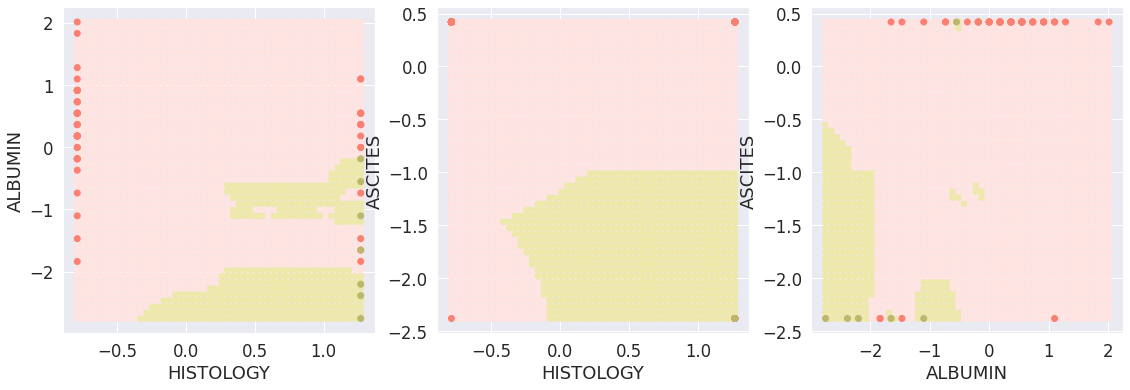

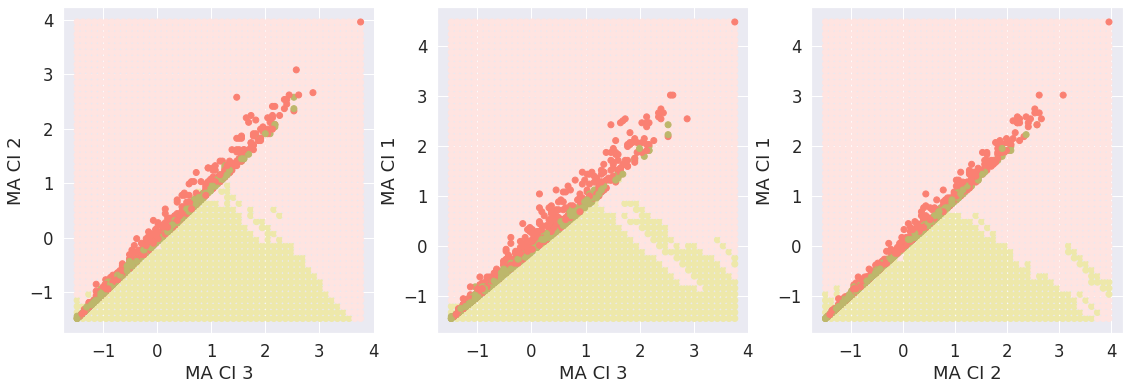

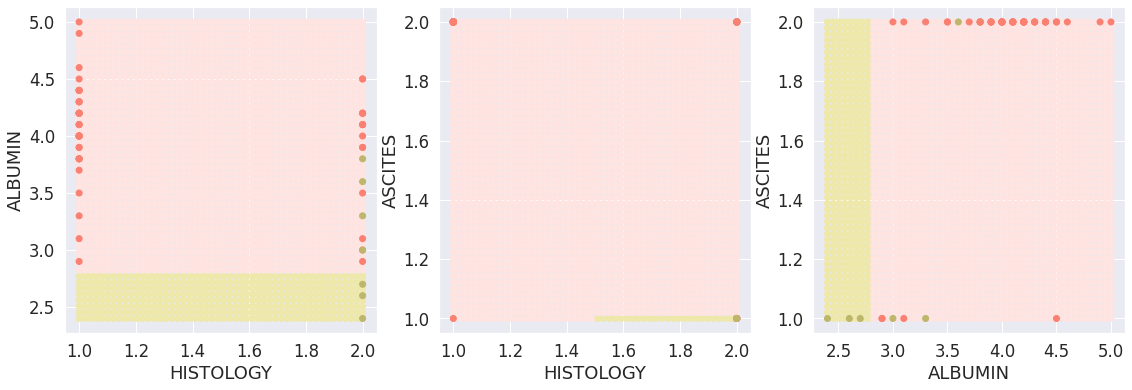

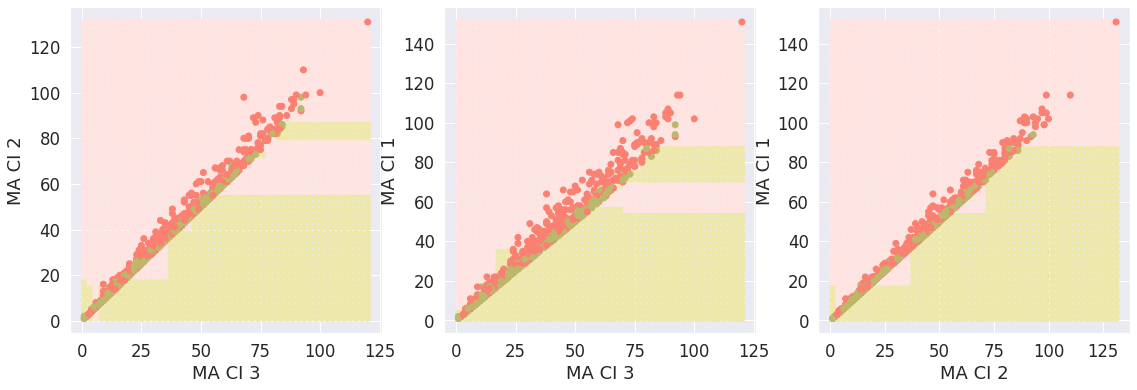

In [ ]:
#Plotting KNN and DT decision boundaries for each data set using the optimal hyperparamters found above
db_knn_hep_1 = DecisionBoundaries(cds_1, '')
db_knn_hep_2 = db_knn_hep_1.KNN_decision_boundary(stand_hep_train_x, hep_train_y, 5, euclidean)

db_knn_DRD_1 = DecisionBoundaries(cds_2, '')
db_knn_DRD_2 = db_knn_DRD_1.KNN_decision_boundary(stand_DRD_train_x, DRD_train_y, 31, euclidean)

db_dt_hep_1 = DecisionBoundaries(cds_1, '')
db_dt_hep_2 = db_dt_hep_1.decision_tree_decision_boundary(hep_train_x, hep_train_y, 2, gini_index)

db_dt_DRD_1 = DecisionBoundaries(cds_2, '')
db_dt_DRD_2 = db_dt_DRD_1.decision_tree_decision_boundary(DRD_train_x, DRD_train_y, 7, gini_index)